# Heart Disease Proposal

## Introduction

<img align="left" src="https://domf5oio6qrcr.cloudfront.net/medialibrary/5042/n0318g16207256840245.jpg" width="200"/>

*image source: https://www.health.harvard.edu/heart-health/a-closer-look-at-heart-disease-risk*

**Background information on heart disease**

- Heart disease is a variety of conditions that effect the heart, while angina specifically is a type of discomfort or chest pain that results when one’s heart muscles don’t get enough oxygen from their blood. 

**Essential question**

- Is there a certain target audience (determined by sex, age, habits, and medical history) at risk for heart disease? 

**Identify and describe the dataset that will be used to answer the question**

- The dataset contains patient chart data provided by physicians from 4 different cardiovascular clinics in Hungary, Switzerland and the United States. Processed data donated on July 1st, 1998 contains 14 different variables concerning patient information and factors that affect heart disease. 
Our project will focus on the data from Cleveland, USA and these are the predictor variables we will use to answer our question:
 
    
    - `age` - The average price of a single avocado.
    - `sex` - conventional or organic
    - `trestbps` - Resting blood pressure
    - `chol` - Serum cholestrol
    - `fbs` - Fasting blood sugar
    - `restecg` - Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 3 = showing probable/definite left ventricular hypertrophy)  
    - `thalach` - Maximum heart rate achieved   
    - `exang` - Exercise induced angina (1 = yes; 0 = no)
    - `oldpeak` - ST depression induced by exercise relative to rest  
    - `ca` - Number of major vessels (0-3) colored by flourosopy  
    - `cp` - Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
    - `slope` - Slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)  



- If the predictor variables hold a positve relationship variables will then help us build an identity or predicted audience at risk of our target variable:
    - `num` - Diagnose of heart disease (Presence (values 1,2,3,4) from absence (value 0).



- The original datasets are available here: 

    - Heart Disease: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Preliminary exploratory data analysis

**Loading R libraries**

In [1]:
### Run the R libraries 
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows
options(repr.plot.width=10, repr.plot.height=10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Reading the data from web into R and assigned column names**

In [2]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE) 
       
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "num")


cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Filtering the n.a./missing values** 

We can see that only the ca and thal columns are in `chr`, while every other column is in numeric data type `dbl`. This indicates that only ca and thal have missing value since we know that the missing value are represented by "?" in this dataset. We can then filter the "?" out of these two columns, and use the `drop_na()` function to make sure we drop rows with missing values in a data frame.

In [3]:
filtered_data <- cleveland_data |>
filter(ca != "?", thal != "?")|>
drop_na()


filtered_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Mutating Data**

Next, because the factors 1,2,3 and 4 in the "num" column all indicate the presence of heart disease in a patient, we mutate and combine them into a single variable for convenience. We are also mutating the `num` column to factor because it is our target variable.

In [4]:
mutate_data <- filtered_data |>
mutate(num = ifelse(num == 0, 0, 1)) |>
mutate(num = as_factor(num))


mutate_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Changing the column data type**

Now that we've cleared the missing values, we can mutate the `ca` and `thal` columns from character to numeric.

In [5]:
final_data <- mutate_data |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))

final_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


**Spliting the data into training and testing data**

In [6]:
heart_split <- initial_split(final_data, prop = 0.75, strata = num)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

heart_train
heart_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,3,130,253,0,0,179,0,0.0,1,0,3,0
58,0,4,170,225,1,2,146,1,2.8,2,2,6,1
56,1,2,130,221,0,2,163,0,0.0,1,0,7,0


**Summarizing the Data**

In [7]:
count_sex <- heart_train|>
    group_by(sex)|>
    summarize(n = n())

count_fbs <- heart_train|>
    group_by(fbs)|>
    summarize(n = n())

count_restecg <- heart_train|>
    group_by(restecg)|>
    summarize(n = n())

count_exang <- heart_train|>
    group_by(exang)|>
    summarize(n = n())

count_slope <- heart_train|>
    group_by(slope)|>
    summarize(n = n())

count_ca <- heart_train|>
    group_by(ca)|>
    summarize(n = n())

count_thal <- heart_train|>
    group_by(thal)|>
    summarize(n = n())

count_cp <- heart_train|>
    group_by(cp)|>
    summarize(n = n())

count_sex
count_fbs
count_restecg
count_exang
count_slope
count_ca
count_thal
count_cp

sex,n
<dbl>,<int>
0,74
1,148


fbs,n
<dbl>,<int>
0,190
1,32


restecg,n
<dbl>,<int>
0,110
1,4
2,108


exang,n
<dbl>,<int>
0,148
1,74


slope,n
<dbl>,<int>
1,106
2,99
3,17


ca,n
<dbl>,<int>
0,133
1,51
2,26
3,12


thal,n
<dbl>,<int>
3,122
6,14
7,86


cp,n
<dbl>,<int>
1,16
2,35
3,65
4,106


In [8]:
mean_data <- heart_train|>
    select(age,trestbps,chol,thalach,oldpeak)|>
    summarize(across(age:oldpeak, mean, na.rm = TRUE))
mean_data

age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.63514,131.3243,246.7207,149.2162,1.019369


**Discover the distribution of heart disease**

In [9]:
counting_types <- heart_train |>
    group_by(num)|>
    summarize(types_count = n()) 
counting_types

num,types_count
<fct>,<int>
0,120
1,102


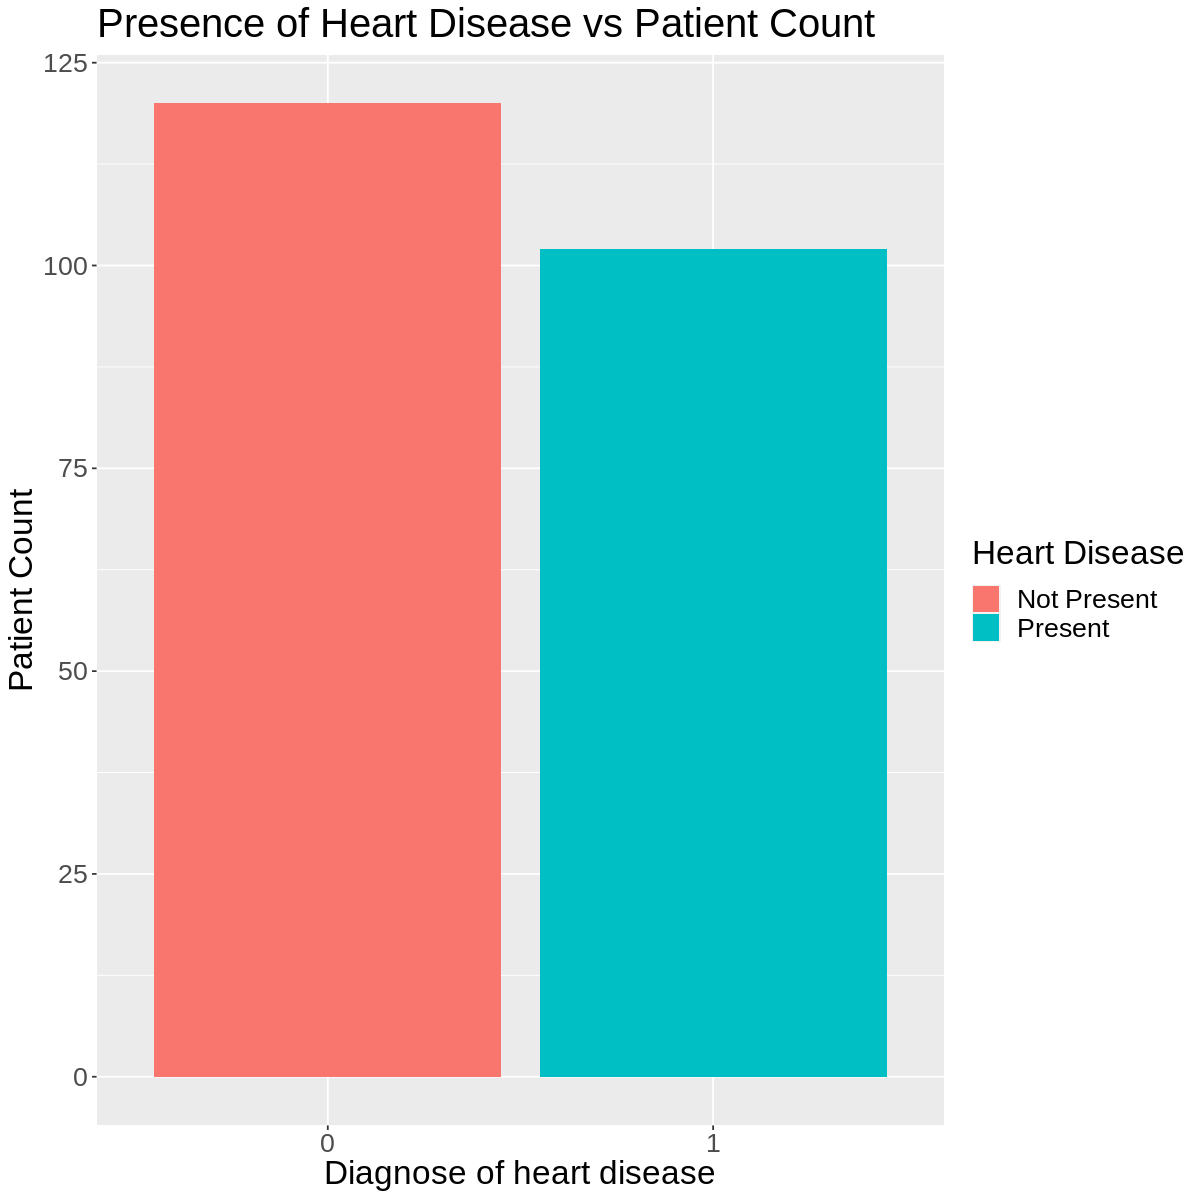

In [10]:
type_vs_num <- counting_types |>
    ggplot(aes(x = num, y = types_count, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "Diagnose of heart disease",y = "Patient Count", color = "Heart Disease") +
    ggtitle("Presence of Heart Disease vs Patient Count") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
    theme(text = element_text(size = 20))
type_vs_num

We can see from the graph above that the two different classifications for the presence of heart disease are not evenly distributed in the data set. What we can do in the future is use the `up_sampling()` function from `library(themis)` in our classification recipe to balance the distribution of different types. Neeeeeeeeeed Change !

**Visualizing data**

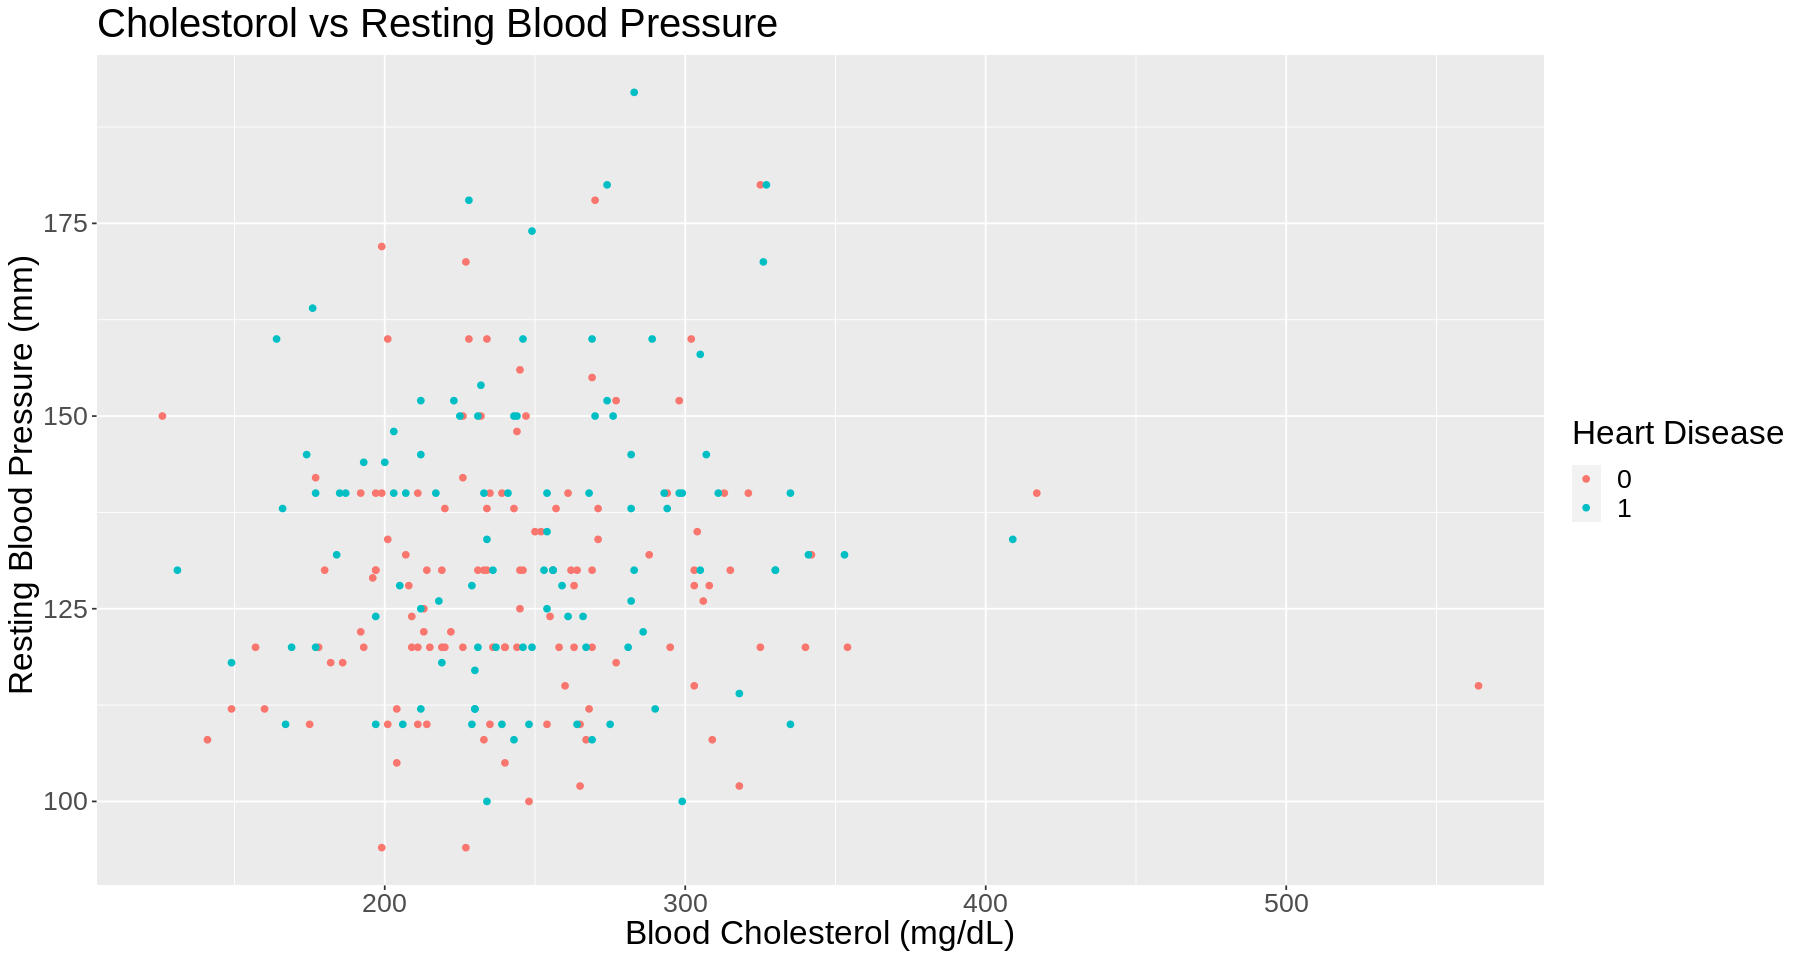

In [11]:
options(repr.plot.width = 15, repr.plot.height = 8) 

trestbps_vs_chol <- heart_train |>
    ggplot(aes(x = chol , y = trestbps, color = num))+
    geom_point()+
    labs(x = "Blood Cholesterol (mg/dL)", y = "Resting Blood Pressure (mm) ", color = "Heart Disease", labels = c("Not Present", "Present")) +
    ggtitle("Cholestorol vs Resting Blood Pressure")+
    theme(text = element_text(size = 20))
trestbps_vs_chol

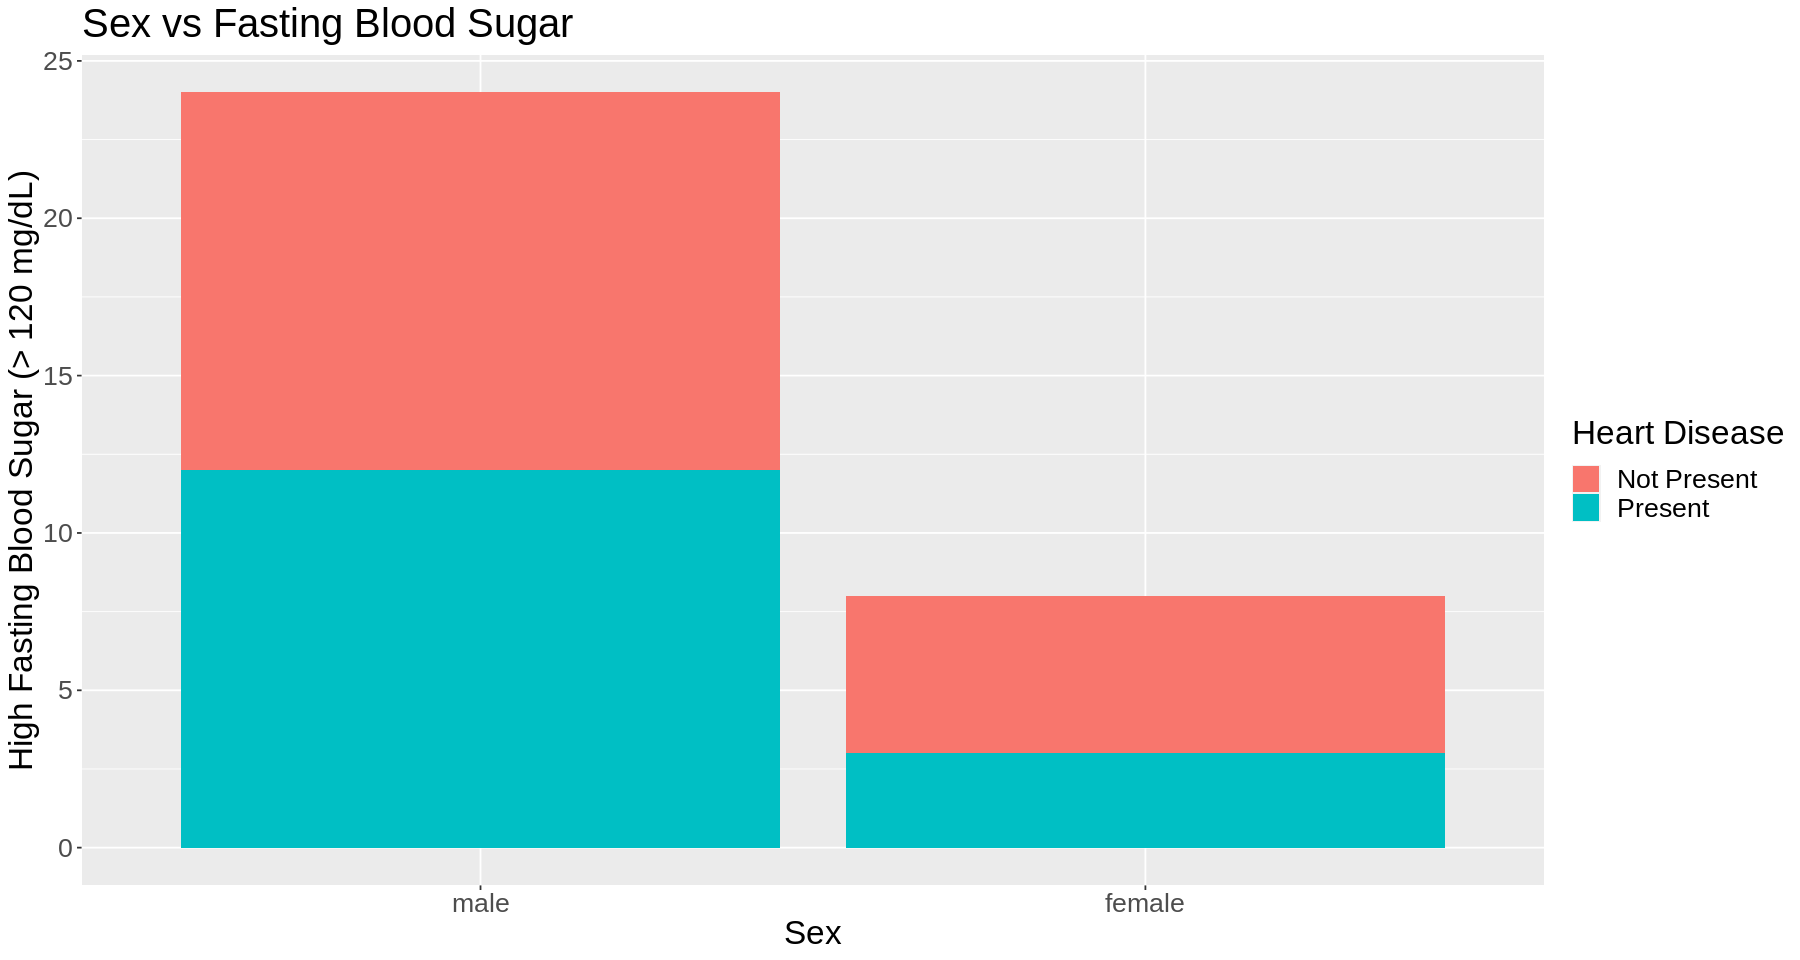

In [12]:
age_plot  <- heart_train |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = fbs, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "Sex", y = "High Fasting Blood Sugar (> 120 mg/dL)", fill = "Heart Disease") +
    ggtitle("Sex vs Fasting Blood Sugar") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
    theme(text = element_text(size = 20))
age_plot

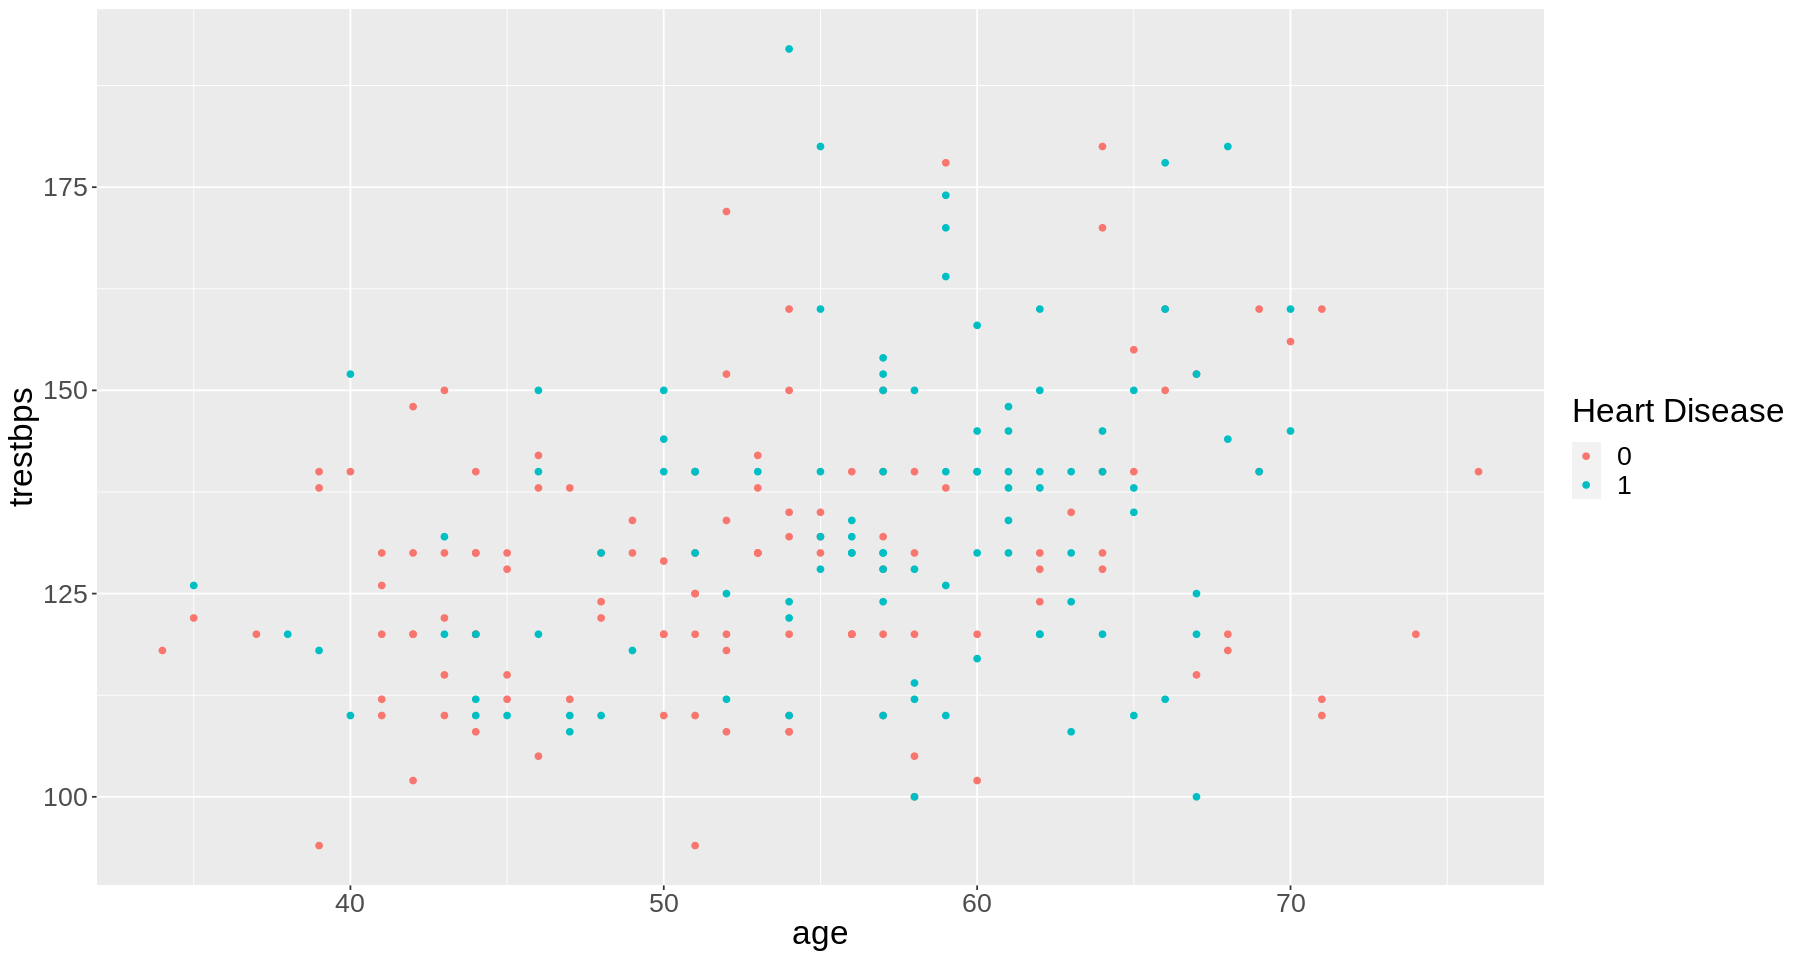

In [13]:
trestbps_vs_age <- heart_train |>
    ggplot(aes(x = age , y = trestbps, color = num)) +
    geom_point() +
    labs(x = "age", y = "trestbps", color = "Heart Disease") +
    theme(text = element_text(size = 20))
trestbps_vs_age

Here, we visualize the distribution of chest pain types of males vs females.

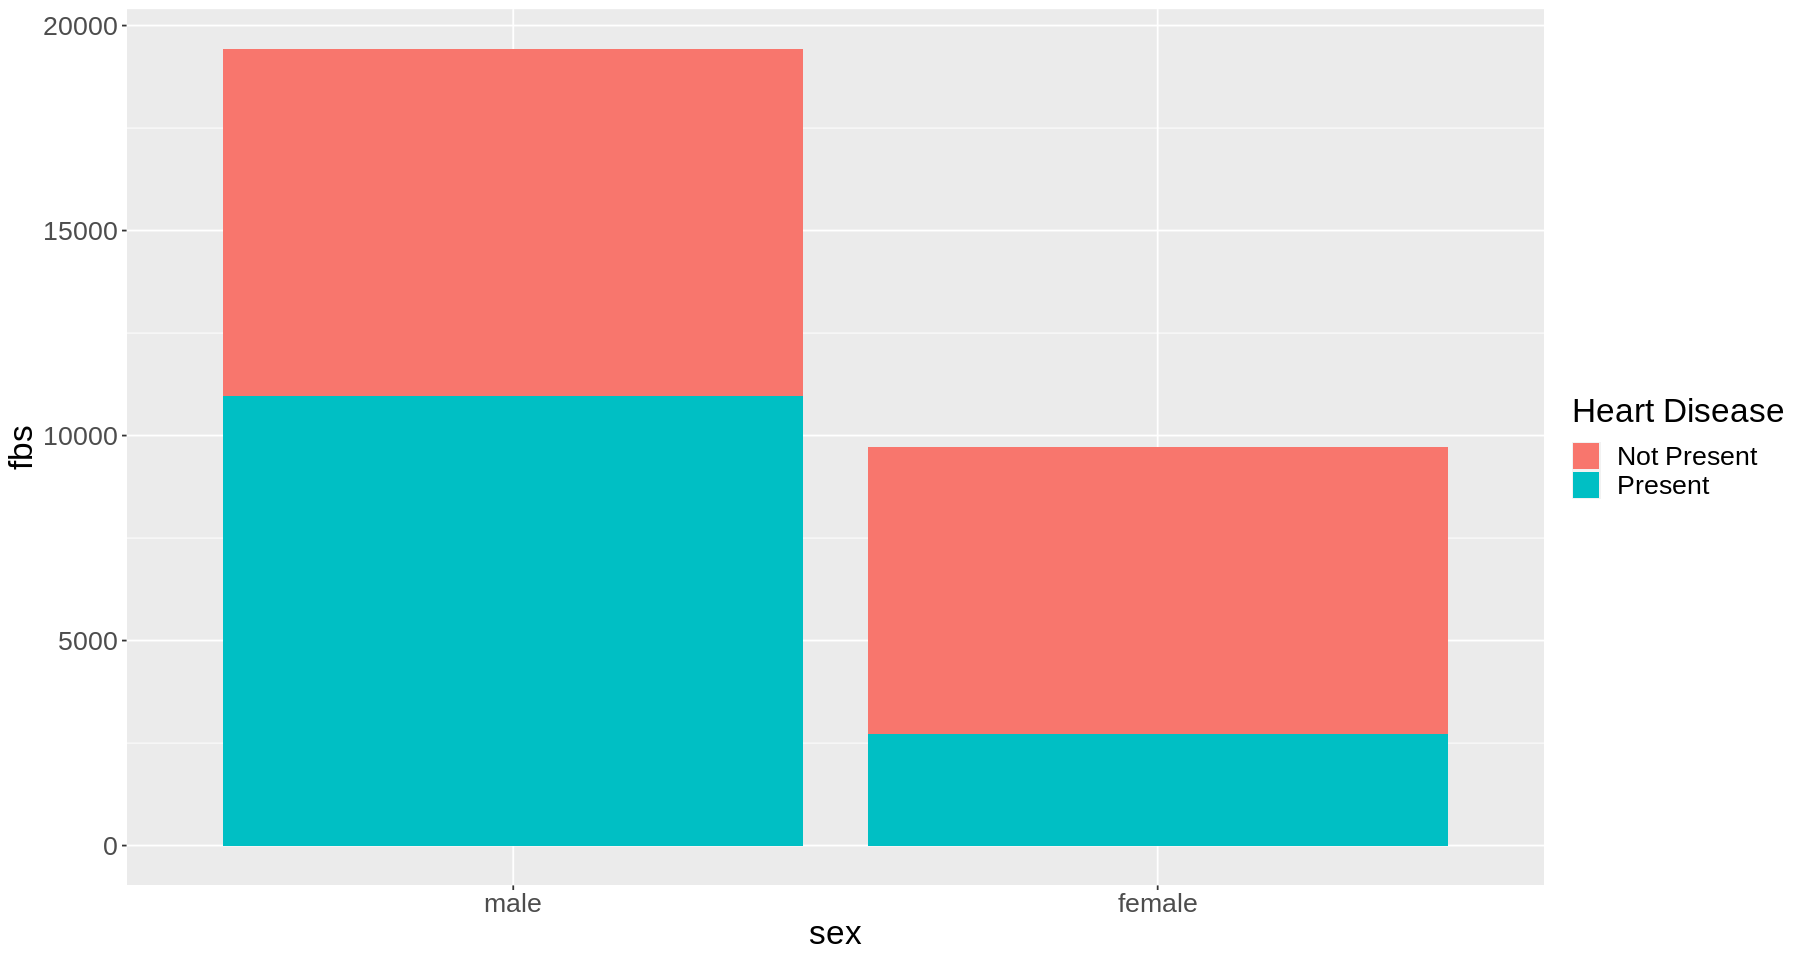

In [14]:
sex_vs_fbs  <- heart_train |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = trestbps, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "fbs", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
    theme(text = element_text(size = 20))
sex_vs_fbs

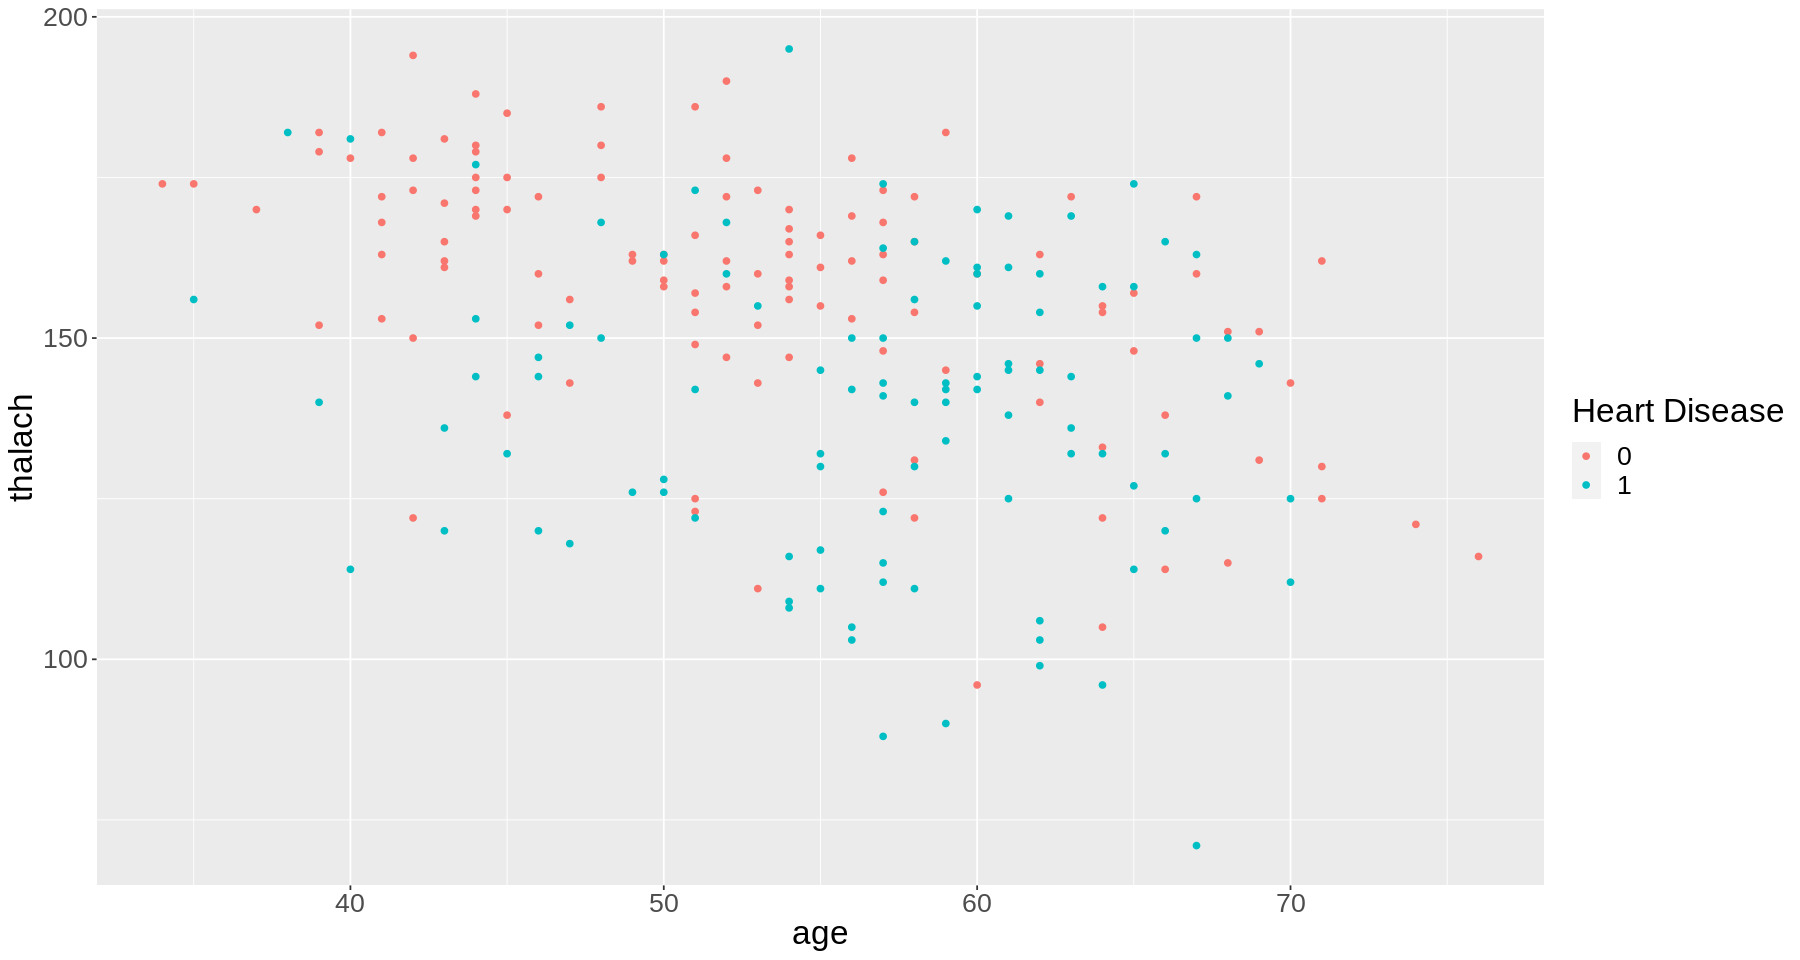

In [15]:
age_vs_thalach <- heart_train |>
    ggplot(aes(x = age , y = thalach, color = num)) +
    geom_point()+
    labs(x = "age", y = "thalach", color = "Heart Disease") +
    theme(text = element_text(size = 20))
age_vs_thalach

**Overlaying distribution of the predictor variable**

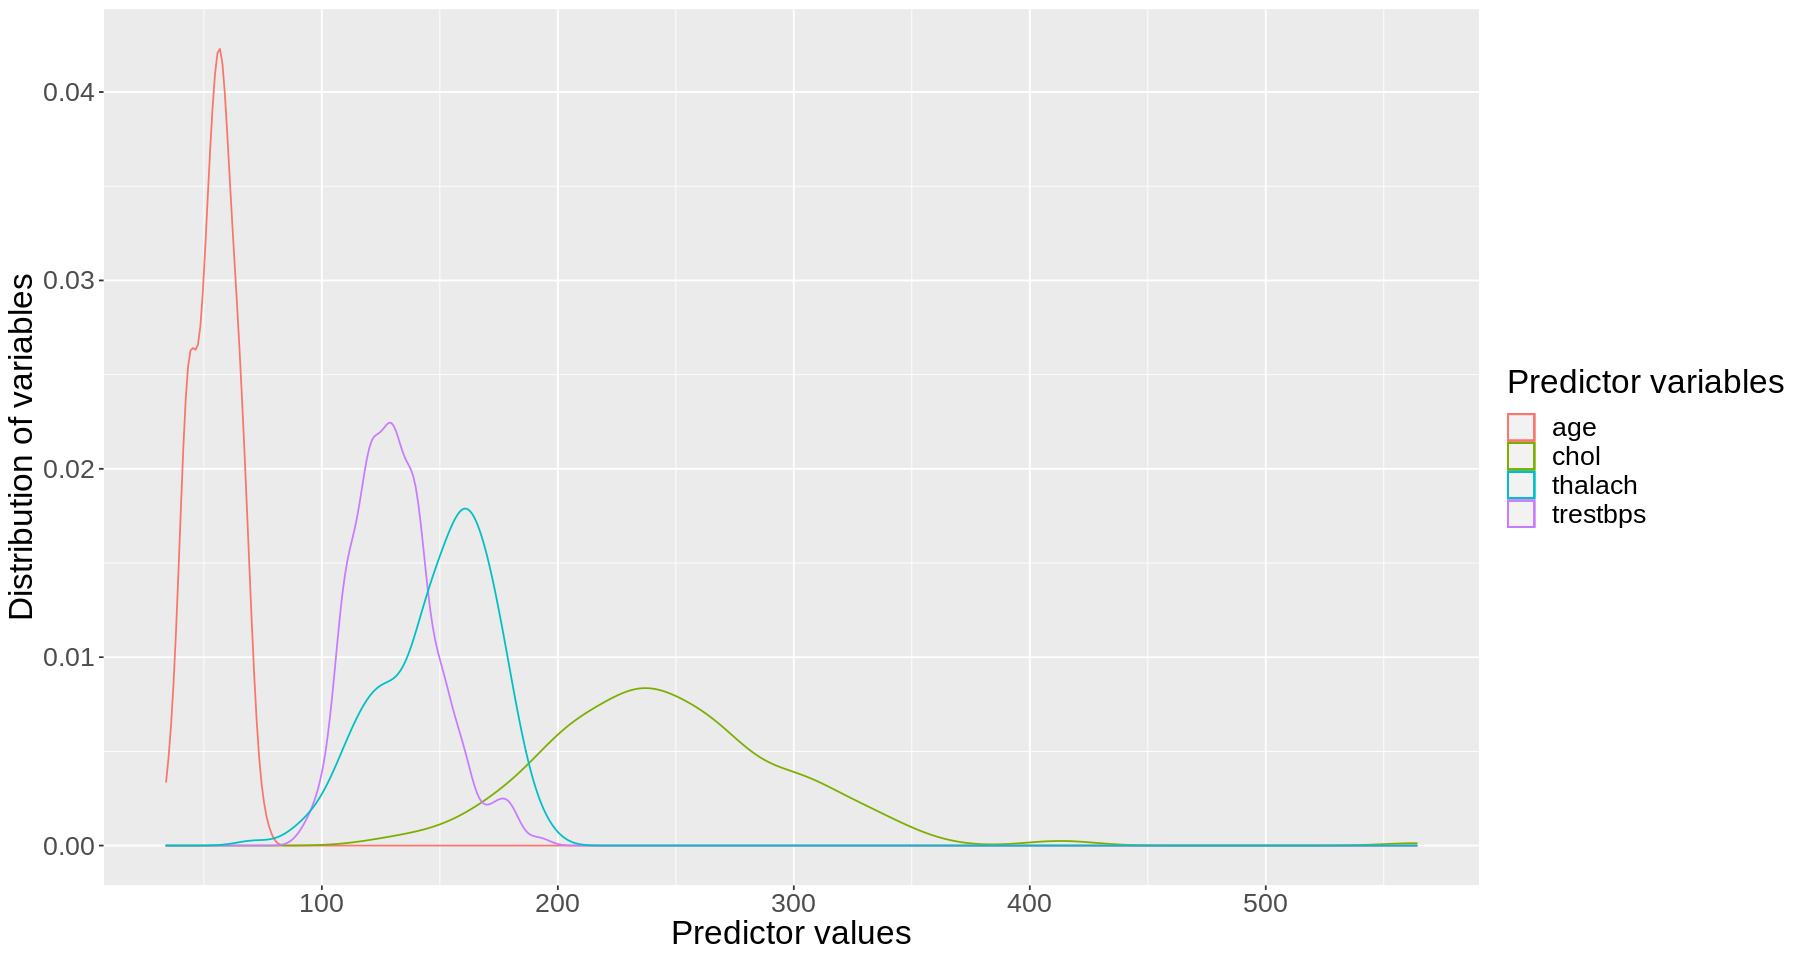

In [16]:
ggplot(heart_train) + 
    geom_density(aes(x=age, color = 'age')) +
    geom_density(aes(x=chol, color = 'chol')) +
    geom_density(aes(x=trestbps, color = 'trestbps')) +
    geom_density(aes(x=thalach, color = 'thalach'))+
    labs(x = "Predictor values", y = "Distribution of variables", color = "Predictor variables") +
    scale_fill_discrete(name = "Chest Pain Type", labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic")) +
    theme(text = element_text(size = 20))

## Methods

**Explain how you will conduct either your data analysis and which variables/columns you will use -> predictors, using classification, validation in the end**
- Our project question asks us to identify whether there is a certain target audience/identity associated with the diagnosis of heart disease. To do this,  a thorough data analysis will need to be conducted by our team. We will check for the relationship between each variable and the diagnosis of heart disease as a class. We will then use the variables with a positive relationship as predictor variables. Eventually, we will build an identity or predicted audience strongly associated with heart disease diagnosis.


## Expected outcomes and significance

**What do you expect to find?**
- Our team predicts that heart risk disease will mainly attract an audience of older age and previous chest pain experiences. Additionally, we have seen through previous literature reviews, that there is a correlation between males and increased chest pain compared to females. We also predict that smokers will be more susceptible to heart risk disease whereas non-smokers will be more likely to be asymptomatic. However, our team will conduct more background research to solidify our prediction.

**What impact could such findings have?**
- The reasoning behind this project is to ensure the general public is aware of certain life factors they may have that are making them more susceptible to heart disease. This could lead to folks putting in place preventive measures and taking care of themselves in specific ways to prevent the specific chest pain that their identity correlates to. The purpose of these findings is to create awareness around heart disease risk and to push others toward regular checkups and monitoring. 

**What future questions could this lead to?**
- These findings could lead to follow-up questions that inquire and try to find the reasoning behind why heart disease is more susceptible to a specific identity. These findings could also push others to question what other external factors not considered in this project could influence the risk of heart disease.
